In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Arrow_cube_data.hdf5
f = h5py.File('Arrow_cube_data.hdf5', 'r')

In [4]:
print(f.keys())
bottle_data = f['Bottle']

<KeysViewHDF5 ['Bottle', 'Cap']>


In [6]:
bottle_data.keys()
angles = bottle_data['angles']
images = bottle_data['images']

In [7]:
print(type(angles))
print(type(images))

print(angles.shape)
print(images.shape)

<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
(20000, 3, 3)
(20000, 256, 256, 3)


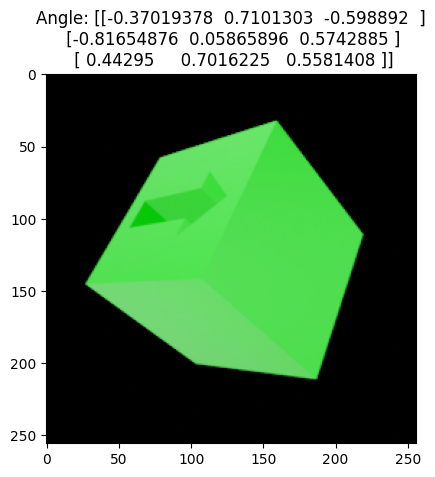

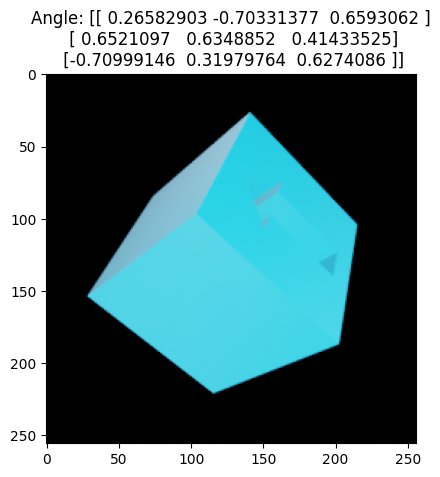

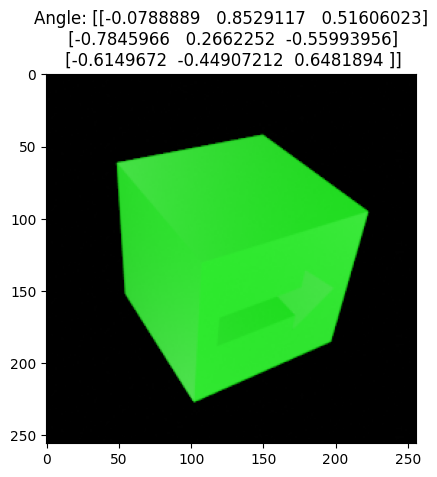

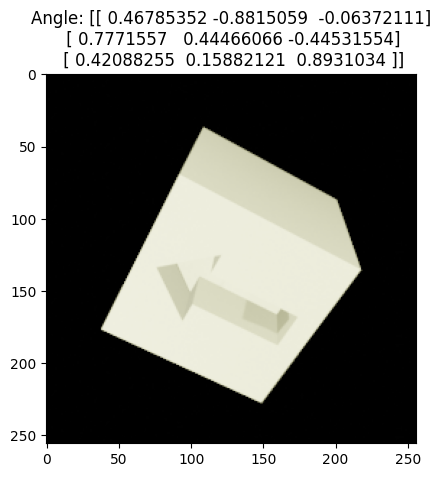

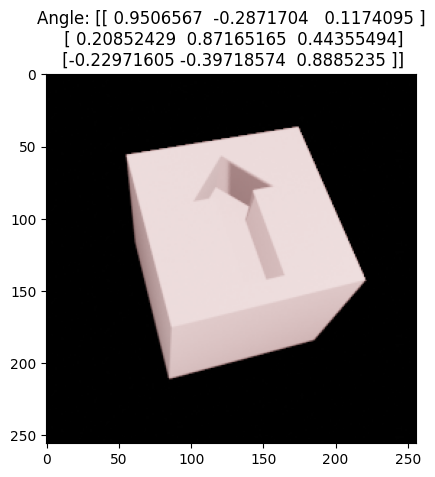

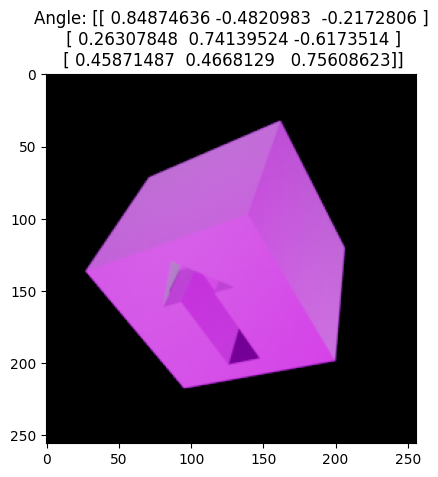

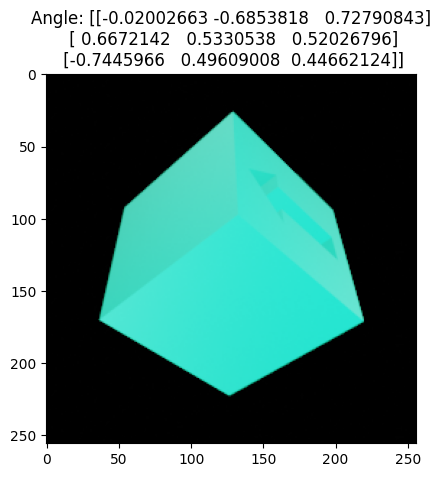

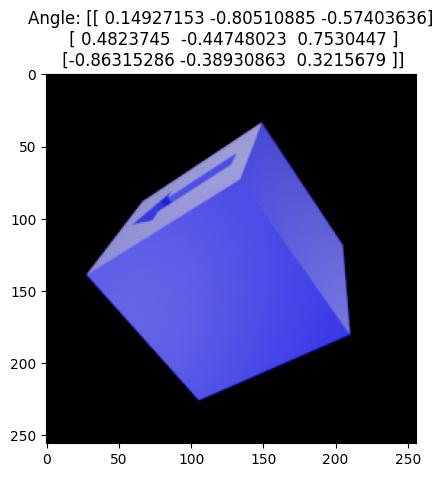

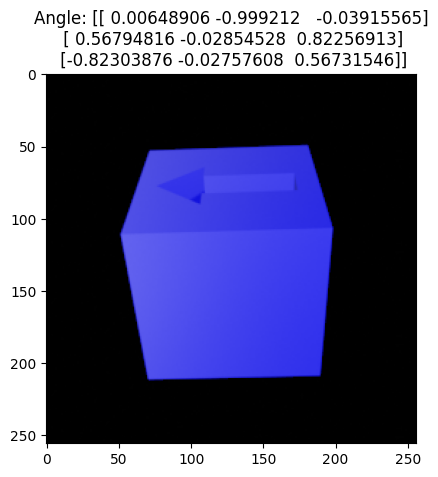

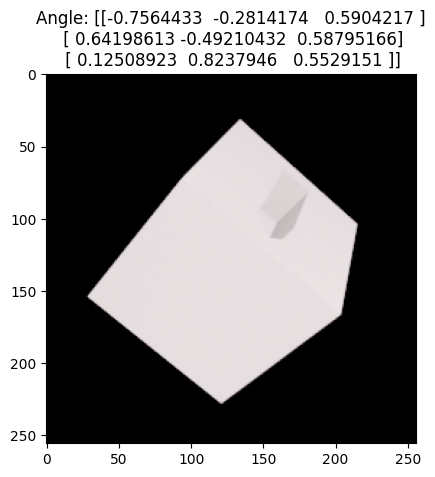

In [8]:
# Iterate through bottle_data
for i in range(0, 10):
    plt.figure()
    plt.imshow(images[i, :, :])
    plt.title('Angle: ' + str(angles[i]))
    plt.show()

In [21]:
from bc_dataloader import BottleCapDataset
import os
import matplotlib.pyplot as plt
import numpy as np

data_dir = "bottle_cap_data_simple/"
subset = sorted(os.listdir(data_dir))
# Remove everything after the first _
data_dir = "bottle_cap_data_simple"
subset = [i.split('_')[0] for i in subset]
print("Items in subset: ", subset)
neg_samples = 10
preprocess = False

#dataset = BottleCapDataset(data_dir, subset, neg_samples, preprocess=False, type="train")

dataset = BottleCapDataset('.', ['Cross'], 10, preprocess=False, type="train")

print("length,", len(dataset))
l = len(dataset)

Items in subset:  ['test', 'train']
length, 40


Index:  0
Image shape:  torch.Size([3, 256, 256])
Label:  (11, 9)
Euler angles:  -48.35523943348215 47.43801587129696 25.38672702419375


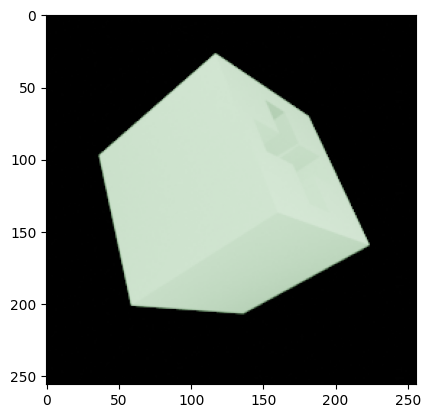

Index:  1
Image shape:  torch.Size([3, 256, 256])
Label:  (11, 9)
Euler angles:  -48.35523934854688 47.43801613920046 115.38672698687104


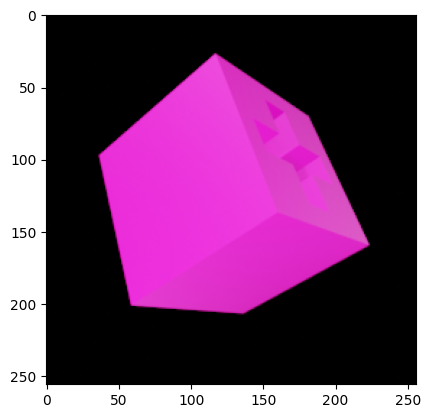

Index:  2
Image shape:  torch.Size([3, 256, 256])
Label:  (11, 9)
Euler angles:  -48.35523943348215 47.43801587129696 -154.61327297580624


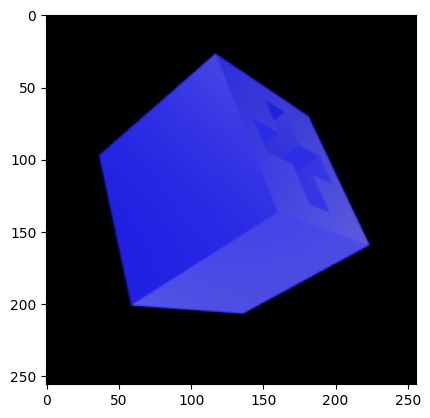

Index:  3
Image shape:  torch.Size([3, 256, 256])
Label:  (11, 9)
Euler angles:  -48.35523934854688 47.43801613920046 -64.61327301312895


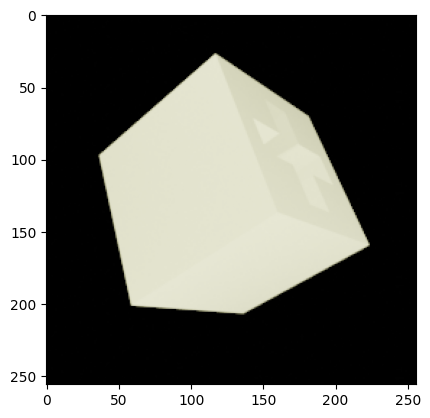

Index:  4
Image shape:  torch.Size([3, 256, 256])
Label:  (11, 9)
Euler angles:  44.881033153929096 -28.711905156039535 -175.67963948749573


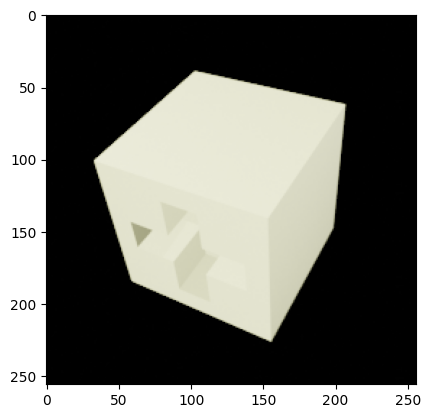

In [23]:
from scipy.spatial.transform import Rotation as R
# Test 5 random indexes between 0 and 360000
indices = []
for i in range(0, 5):
    # idx = np.random.randint(0, l)
    idx = i
    indices.append(idx)
    print("Index: ", idx)

    img, label = dataset[idx]
    print("Image shape: ", img.shape)
    print("Label: ", label.shape)
    l_mat = label[0].reshape(3, 3)
    x,y,z = R.from_matrix(l_mat).as_euler('XYZ', degrees=True)
    print("Euler angles: ", x,y,z)
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

In [12]:
import h5py

for n in indices:
    file_idx = n // 40000
    print("File: ", subset[file_idx])
    component_idx = (n % 40000) // 20000
    print("Component should be 0: ", component_idx)
    image_idx = (n % 40000) % 20000
    print("Image : ", image_idx) 

    file = h5py.File(f"{data_dir}/{subset[file_idx]}_cube_data.hdf5", "r")
    img = file[dataset.components[component_idx]]["images"][image_idx]
    print("Image shape: ", img.shape)
    plt.imshow(img)
    plt.show()

IndexError: list index out of range